<a href="https://colab.research.google.com/github/irfanizzath/MLPractice/blob/main/Data_Preprocessing_and_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as pl
import numpy as np
import seaborn as sns
from matplotlib import rcParams

In [ ]:
df = pd.read_csv('/content/insurance.csv')
pd.set_option('display.max_columns',None)
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [ ]:
df['age'].fillna(df['age'].median(),inplace=True)

In [ ]:
df['smoker'].fillna(df['smoker'].mode(),inplace =True)

In [ ]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
print('The regions studied were:')
for i in df.region.unique():
  print(i)

The regions studied were:
southwest
southeast
northwest
northeast


In [ ]:
df.region.nunique()

4

In [ ]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
df.corr(numeric_only = True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


## The charges column is the target columm for the insurance company

In [ ]:
print(df.corr().charges.sort_values(ascending=False))

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64


<ipython-input-140-9ab6c41fb3cc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr().charges.sort_values(ascending=False))


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### **Univariate Analysis**

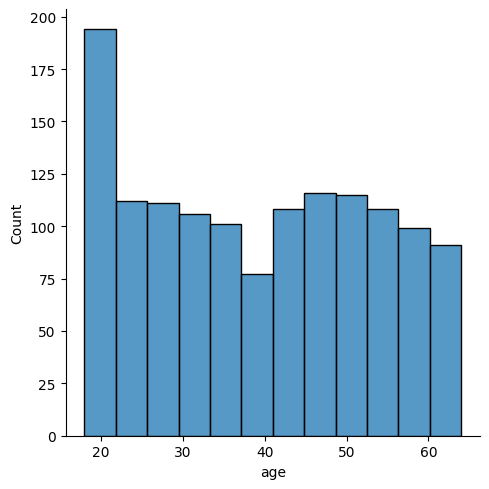

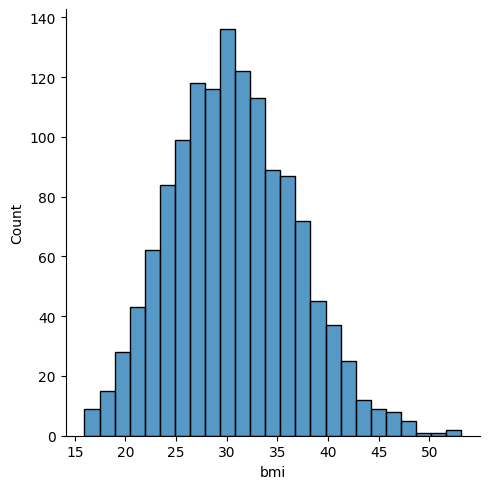

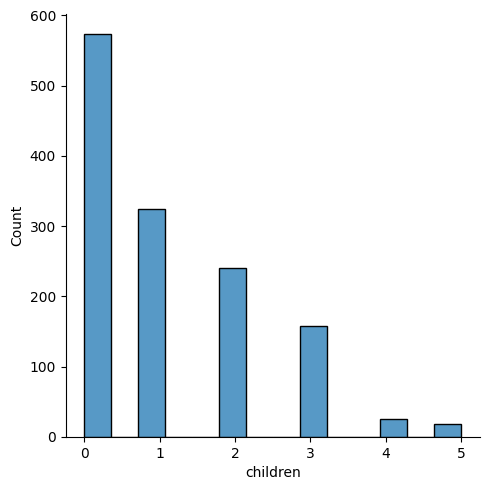

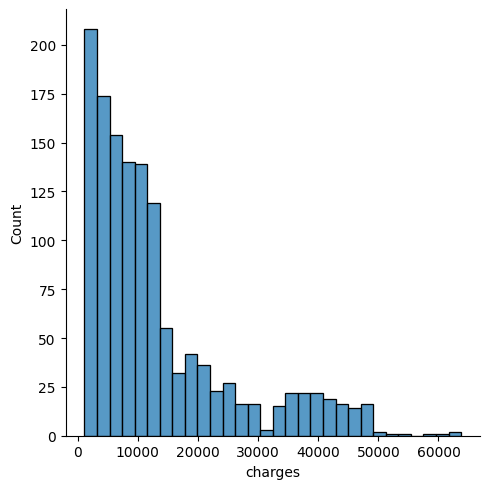

In [ ]:
l = ['age',  'bmi', 'children', 'charges']
for i in l:
  sns.displot(df[i])
  pl.show()

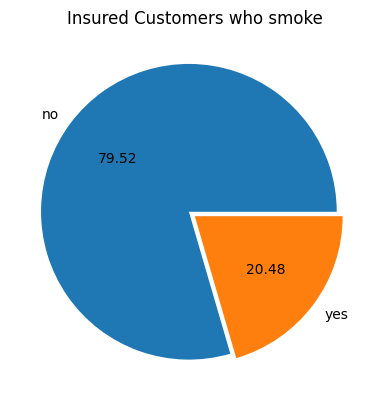

In [ ]:
pl.pie(df['smoker'].value_counts(),[0.05,0],labels = df['smoker'].value_counts().index,  autopct='%.2f',shadow = False)
pl.title('Insured Customers who smoke')
pl.show()

In [ ]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

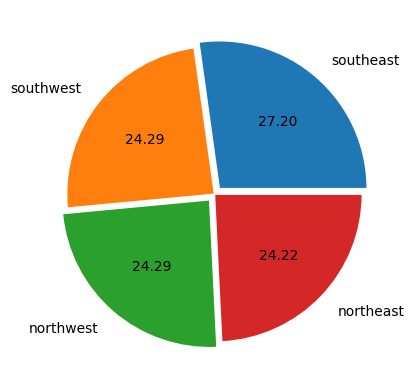

In [ ]:
pl.pie(df.region.value_counts(), [0.05,0,0.05,0], labels = df.region.value_counts().index, autopct = '%.2f',labeldistance=1.15, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' })
pl.show()

<Axes: ylabel='region'>

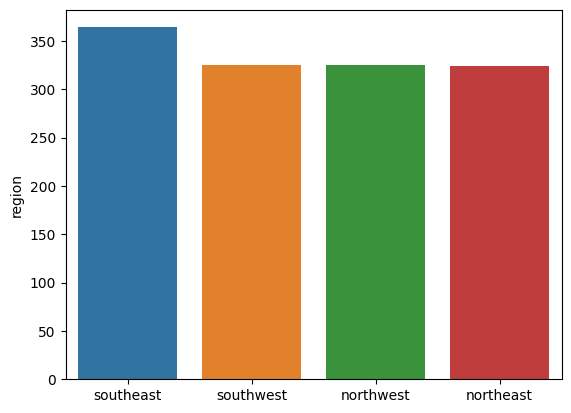

In [ ]:
sns.barplot(x = df.region.value_counts().index ,y =df.region.value_counts())

### **Bivariate analysis**

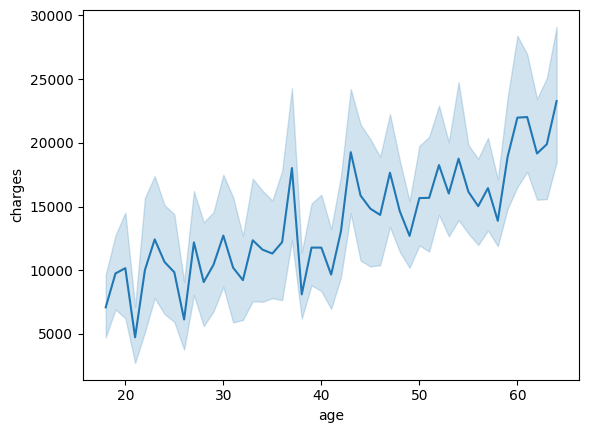

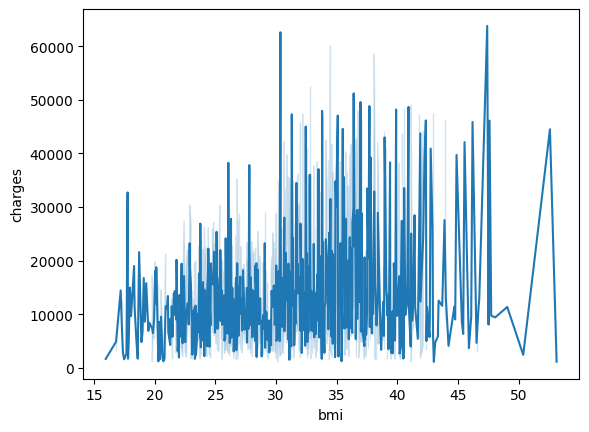

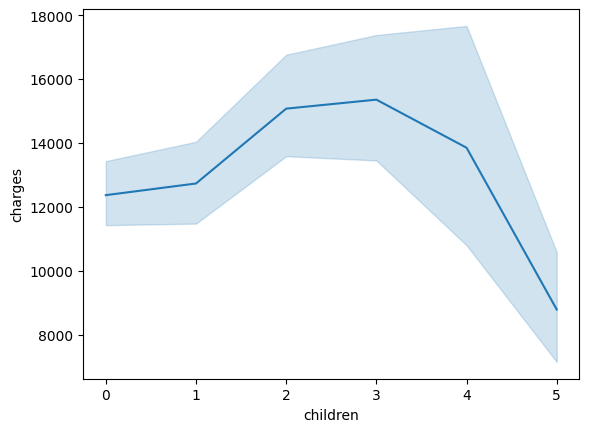

In [ ]:
for i in l[:-1]:
  sns.lineplot(x = df[i],y=df.charges)
  pl.show()

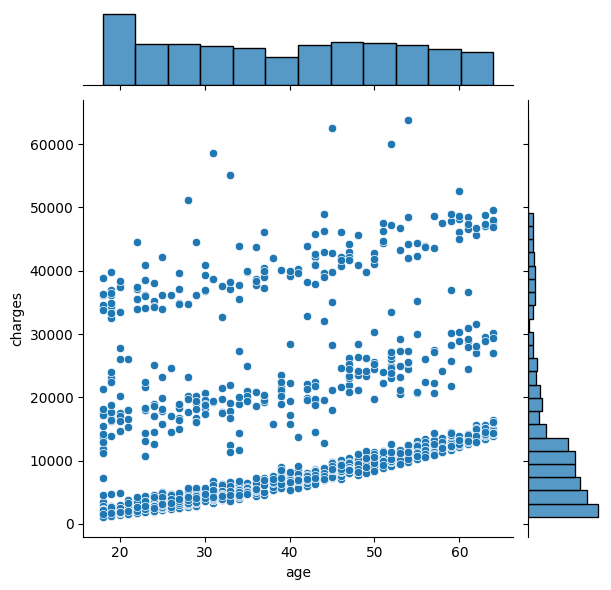

In [ ]:
sns.jointplot(x= 'age',y ='charges',data=df)

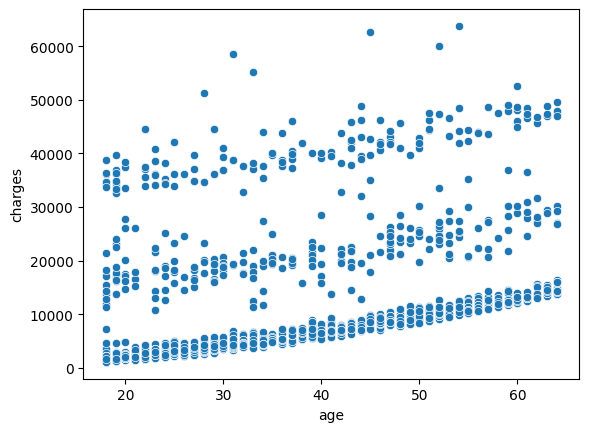

In [ ]:
sns.scatterplot(x = df.age, y = df.charges)
pl.show()

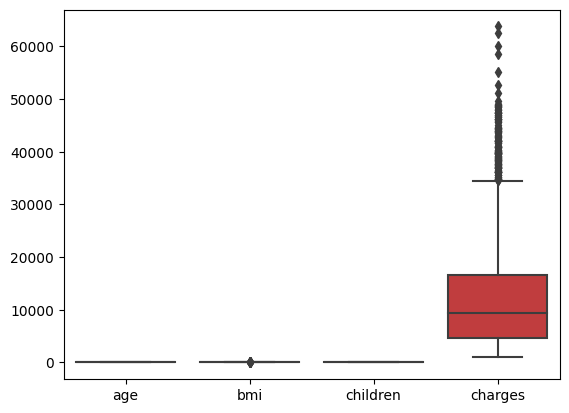

In [ ]:
sns.boxplot(df)
pl.show()

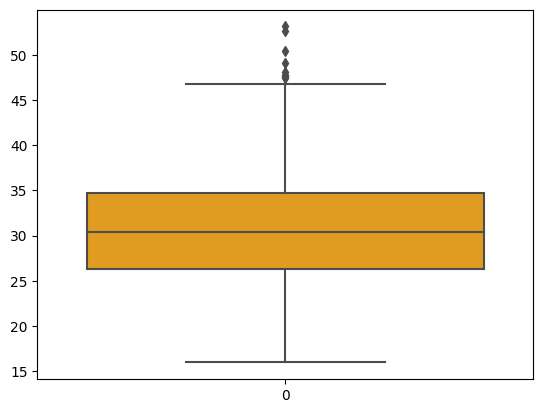

In [ ]:
sns.boxplot(df.bmi, color=  'orange')
pl.show()

In [ ]:
q1 = df.bmi.quantile(0.25)
q3 = df.bmi.quantile(0.75)
IQR = q3 - q1

print('q1, q3, IQR = ', f'{q1}, {q3}, {IQR}')

upper_limit = q3 + 1.5 *IQR
lower_limit = q1 - 1.5 *IQR

q1, q3, IQR =  26.29625, 34.69375, 8.3975


In [ ]:
df.sex.value_counts()


male      676
female    662
Name: sex, dtype: int64

In [ ]:
# One method
# df['bmi'] = np.where(df['bmi']>upper_limit,df.bmi.median(),df['bmi'])

#Alternatively:
df['bmi'][df['bmi'] > upper_limit] = df.bmi.median()

<ipython-input-159-8657b3591012>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bmi'][df['bmi'] > upper_limit] = df.bmi.median()


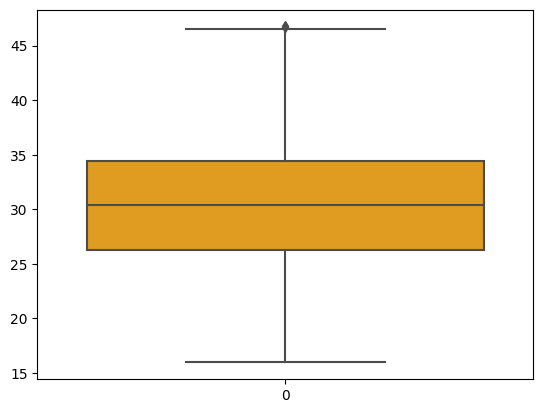

In [ ]:
sns.boxplot(df.bmi, color=  'orange')
pl.show()

percentile method

<Axes: >

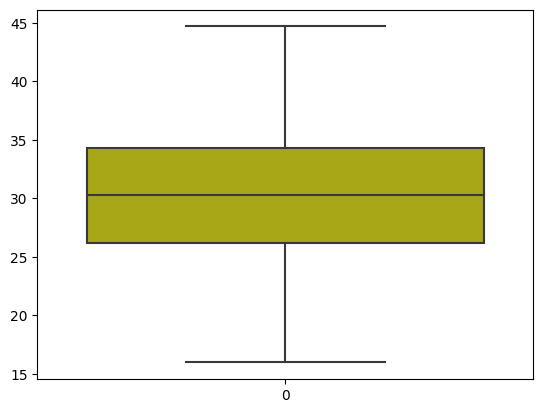

In [ ]:
p99 = df.bmi.quantile(0.99)
df = df[df['bmi'] <= p99]
sns.boxplot(df.bmi, color = 'y')

### **Multivariate analysis**

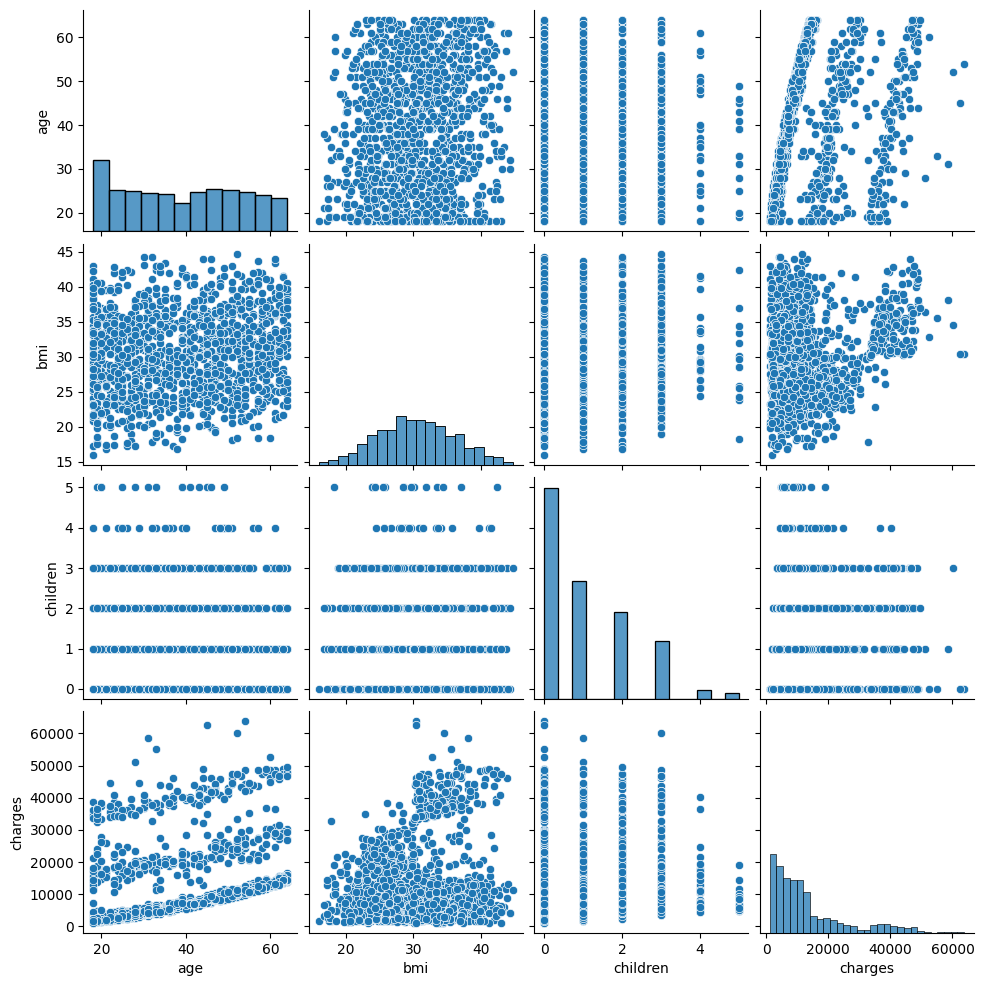

In [ ]:
sns.pairplot(df)
pl.show()

<ipython-input-164-7806e68c15bd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = df.corr(), cmap = 'Blues',annot = True)


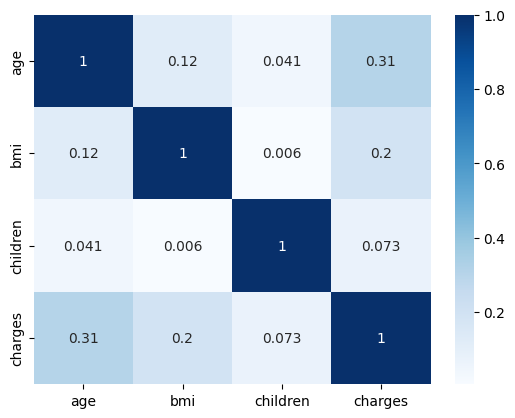

In [ ]:
sns.heatmap(data = df.corr(), cmap = 'Blues',annot = True)
pl.show()

## **Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le =  LabelEncoder()
df.sex.value_counts()
df.smoker = le.fit_transform(df.smoker)
df.sex = le.fit_transform(df.sex)

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


## **One hot Encoding**

In [ ]:
n_df = pd.get_dummies(df,columns=['region'])
n_df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


<Axes: >

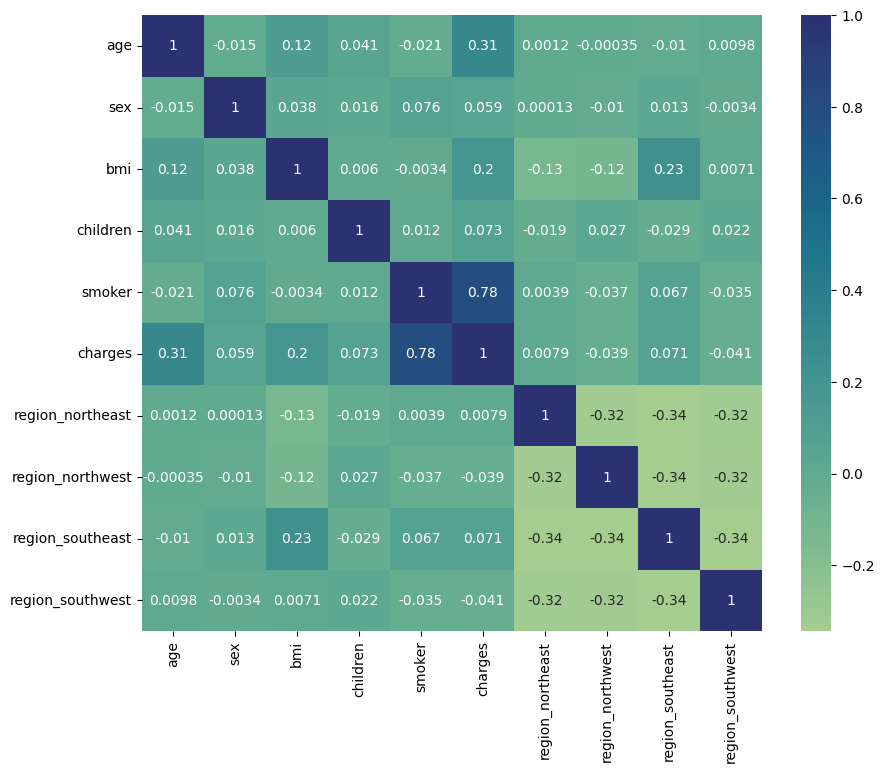

In [ ]:
pl.figure(figsize=(10,8))
sns.heatmap(n_df.corr(),annot = True, cmap= 'crest')

In [ ]:
n_df.corr()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.014626,0.118613,0.041430,-0.021110,0.305426,0.001205,-0.000345,-0.010381,0.009830
sex,-0.014626,1.000000,0.037885,0.016274,0.075900,0.058635,0.000128,-0.010435,0.013324,-0.003390
bmi,0.118613,0.037885,1.000000,0.005965,-0.003401,0.195165,-0.129644,-0.117276,0.233135,0.007123
children,0.041430,0.016274,0.005965,1.000000,0.011892,0.072752,-0.019049,0.027409,-0.029428,0.021882
smoker,-0.021110,0.075900,-0.003401,0.011892,1.000000,0.784967,0.003868,-0.037068,0.066664,-0.035361
charges,0.305426,0.058635,0.195165,0.072752,0.784967,1.000000,0.007914,-0.039327,0.070518,-0.041112
region_northeast,0.001205,0.000128,-0.129644,-0.019049,0.003868,0.007914,1.000000,-0.323999,-0.342501,-0.322677
region_northwest,-0.000345,-0.010435,-0.117276,0.027409,-0.037068,-0.039327,-0.323999,1.000000,-0.343904,-0.323999
region_southeast,-0.010381,0.013324,0.233135,-0.029428,0.066664,0.070518,-0.342501,-0.343904,1.000000,-0.342501
region_southwest,0.009830,-0.003390,0.007123,0.021882,-0.035361,-0.041112,-0.322677,-0.323999,-0.342501,1.000000


<Axes: xlabel='region', ylabel='bmi'>

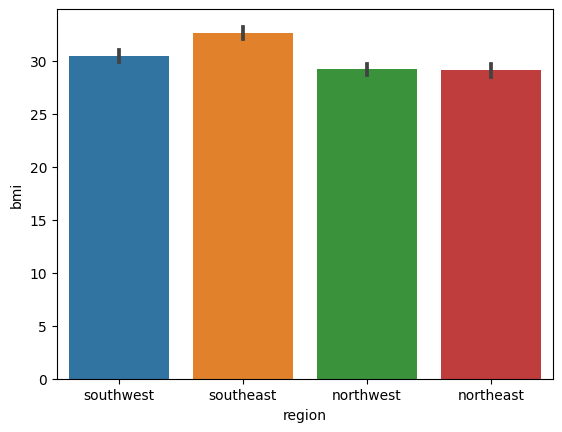

In [ ]:
sns.barplot(x = df.region, y = df.bmi)

### **X and y split, independent variable and dependent varaible**

In [ ]:
y = pd.DataFrame(n_df['charges'])
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [ ]:
x = n_df.drop(columns = ['charges'], axis = 1)

In [ ]:
x

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,0,1,0,0
1334,18,0,31.920,0,0,1,0,0,0
1335,18,0,36.850,0,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,0,1


### **Scaling on independent variables**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [ ]:
X_scaled = pd.DataFrame(scale.fit_transform(x), columns = x.columns)
Y_scaled = y
X_scaled

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0.0,0.415449,0.0,1.0,0.0,0.0,0.0,1.0
1,0.000000,1.0,0.619694,0.2,0.0,0.0,0.0,1.0,0.0
2,0.217391,1.0,0.592902,0.6,0.0,0.0,0.0,1.0,0.0
3,0.326087,1.0,0.234690,0.0,0.0,0.0,1.0,0.0,0.0
4,0.304348,1.0,0.449548,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1319,0.695652,1.0,0.522269,0.6,0.0,0.0,1.0,0.0,0.0
1320,0.000000,0.0,0.555324,0.0,0.0,1.0,0.0,0.0,0.0
1321,0.000000,0.0,0.726862,0.0,0.0,0.0,0.0,1.0,0.0
1322,0.065217,0.0,0.342380,0.0,0.0,0.0,0.0,0.0,1.0


### **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, Y_train, X_test, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.3,random_state=10)

In [ ]:
X_train.shape


(926, 9)

In [ ]:
Y_test.shape

(398, 1)

## **Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#The training data

x=[[500],[700],[900]]   # SqrFt
y= [30,50,70]           # Price

In [ ]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [ ]:
model.predict([[1100],[300],[415]])

array([90. , 10. , 21.5])

In [ ]:
#The training data

x=[[450,5],[750,9],[1000,4]]   # SqrFt, no. of floors
y= [40000,47000,55000]           # Price

In [ ]:
model.fit(x, y)

LinearRegression()

In [ ]:
model.predict([[600,4]])

array([44280.])